In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
previous_years_data = pd.read_csv('../data/2016-08-08-previous-years.xz',
                   usecols = ['month', 'year', 'congressperson_id', 'net_value'],
                   dtype={'congressperson_id': np.str,
                          'month': np.str,
                          'year': np.str})

last_year_data = pd.read_csv('../data/2016-08-08-last-year.xz',
                   usecols = ['month', 'year', 'congressperson_id', 'net_value'],
                   dtype={'congressperson_id': np.str,
                          'month': np.str,
                          'year': np.str})

#Concatenating the datasets
data = pd.concat([last_year_data, previous_years_data])

#Joining month and year columns into a datetime field
data['month'] = pd.to_datetime(data['month']+'-'+data['year'], format='%m-%Y')

#Year field is now unnecessary
data.drop('year', 1, inplace=True)
data.head()

,congressperson_id,net_value,month
0,178957,165.65,2015-11-01
1,178957,59.48,2015-12-01
2,178957,130.95,2015-11-01
3,178957,193.06,2015-12-01
4,178957,310.25,2015-02-01


In [3]:
aggregate = {
    'congressperson_id': {
       'total': 'nunique'   
    },
    'net_value': {
        'mean': 'mean'
    }
}

monthly_group = data.groupby('month').agg(aggregate)
monthly_group.head()

,net_value,congressperson_id
,mean,total
month,,
2009-04-01,717.037767,180
2009-05-01,562.630617,413
2009-06-01,681.557857,172
2009-07-01,452.178851,455
2009-08-01,294.019011,467


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fac3565e668>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fac36286b00>], dtype=object)

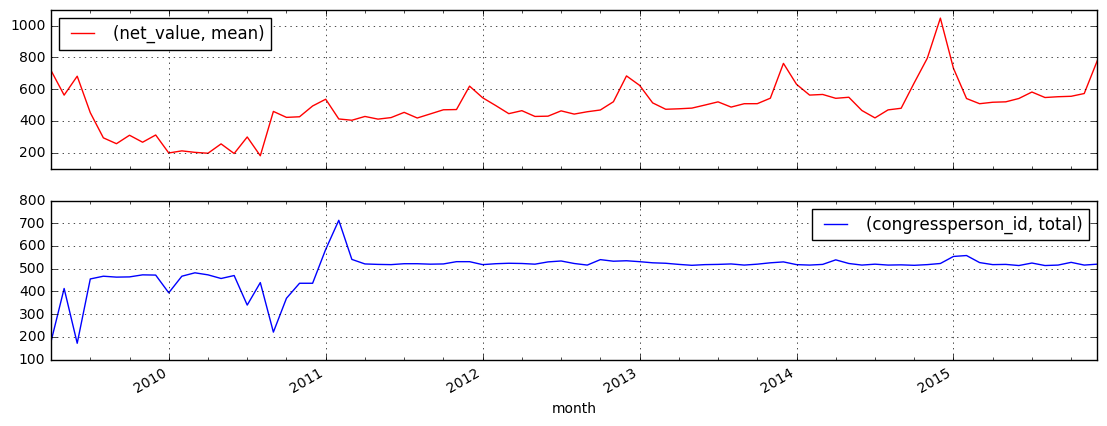

In [4]:
figsize = (8*(len(monthly_group.index)/48), 2.5*len(monthly_group.columns))
monthly_group.plot(figsize=figsize, color=['r', 'b', 'g'], grid='on', subplots=True)

### Questions

- Why the period before 2011 looks messy?
- From 2011 onwards a pattern appears. What is responsible for the raise in the mean at the end o each year?
- Why the mean gets higher at the end of 2014? Is it a reflex of the elections?
- Why the number of deputys getting reimburcements go up at the begining of 2011? Is it a kind of hype? There were changes in the law at that time?